In [1]:
# import the packages we'll use
import pandas as pd
import numpy as np
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#Load the data
weather = pd.read_csv("weatherAus.csv")
weather_copy = weather.copy()

weather_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
#Drop data with null entries in 'RainTomorrow' which is what we will be predicting
df = weather_copy.dropna(subset=['RainTomorrow'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

df.info()

<ipython-input-4-3c96bc6846b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
<ipython-input-4-3c96bc6846b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})


<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
#Drop columns with too many null entries
df2 = df.drop(columns = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir9am     132180 non-null  object 
 8   WindDir3pm     138415 non-null  object 
 9   WindSpeed9am   140845 non-null  float64
 10  WindSpeed3pm   139563 non-null  float64
 11  Humidity9am    140419 non-null  float64
 12  Humidity3pm    138583 non-null  float64
 13  Pressure9am    128179 non-null  float64
 14  Pressure3pm    128212 non-null  float64
 15  Temp9am        141289 non-null  float64
 16  Temp3pm        139467 non-null  float64
 17  RainToday      140787 non-nul

In [7]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [8]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   WindGustDir    132863 non-null  object        
 6   WindGustSpeed  132923 non-null  float64       
 7   WindDir9am     132180 non-null  object        
 8   WindDir3pm     138415 non-null  object        
 9   WindSpeed9am   140845 non-null  float64       
 10  WindSpeed3pm   139563 non-null  float64       
 11  Humidity9am    140419 non-null  float64       
 12  Humidity3pm    138583 non-null  float64       
 13  Pressure9am    128179 non-null  float64       
 14  Pressure3pm    128212 non-null  float64       
 15  

In [9]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0


In [10]:
df2['Year'] = df2['Date'].dt.year
df2['Month'] = df2['Date'].dt.month

print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   WindGustDir    132863 non-null  object        
 6   WindGustSpeed  132923 non-null  float64       
 7   WindDir9am     132180 non-null  object        
 8   WindDir3pm     138415 non-null  object        
 9   WindSpeed9am   140845 non-null  float64       
 10  WindSpeed3pm   139563 non-null  float64       
 11  Humidity9am    140419 non-null  float64       
 12  Humidity3pm    138583 non-null  float64       
 13  Pressure9am    128179 non-null  float64       
 14  Pressure3pm    128212 non-null  float64       
 15  

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0,2008,12


In [11]:
object_col = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

df2[object_col].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
dtype: int64

In [12]:
#With more time, could encode with fewer columns by grouping similar locations and directions, 
#but will do one hot encoding for now

one_hot_cols = pd.get_dummies(df2[object_col]).columns
df2[one_hot_cols] = pd.get_dummies(df2[object_col]).copy()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Columns: 118 entries, Date to WindDir3pm_WSW
dtypes: datetime64[ns](1), float64(13), int64(3), object(4), uint8(97)
memory usage: 37.0+ MB


In [13]:
# Drop encoded columns and date column
df3 = df2.drop(columns = ['Date','Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

print(df3.info())
df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Columns: 113 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(13), int64(3), uint8(97)
memory usage: 31.6 MB
None


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0


In [20]:
na_cols = []
for column in df3.columns:
    if df3[column].isnull().sum() != 0:
        print(column, df3[column].isnull().sum())
        na_cols.append(column)
print(na_cols)

MinTemp 637
MaxTemp 322
Rainfall 1406
WindGustSpeed 9270
WindSpeed9am 1348
WindSpeed3pm 2630
Humidity9am 1774
Humidity3pm 3610
Pressure9am 14014
Pressure3pm 13981
Temp9am 904
Temp3pm 2726
RainToday 1406
['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [24]:
for column in na_cols:
    df3[column] = df3[column].fillna(df3[column].mean())

In [25]:
for column in df3.columns:
    if df3[column].isnull().sum() != 0:
        print(column, df3[column].isnull().sum())

In [26]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.base import clone
## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score

In [28]:
df3.columns[:25]

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Location_Adelaide', 'Location_Albany',
       'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns'],
      dtype='object')

In [29]:
X_cols =[]
for column in df3.columns:
    if column != 'RainTomorrow':
        X_cols.append(column)
len(X_cols)

112

In [31]:
X = df3[X_cols].copy()
y = df3['RainTomorrow'].copy()

In [32]:
X

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,0,0,1,0


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = .25,
                                                 random_state = 614,
                                                 shuffle = True,
                                                 stratify = y)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
## Perform cross-validation to find the optimal
## max_depth for one of the three performance measures


## Sample Answer
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=440)

X_train_copy = X_train[X_cols].copy()

# n will be the maximum max_depth I consider
n = 10

accs = np.zeros((5,n))
precs = np.zeros((5,n))
recs = np.zeros((5,n))

for j in range(1,n+1):
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 440)
    
    i = 0
    for train_index,test_index in kfold.split(X_train_copy,y_train):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train)
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

C:\Users\zivak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zivak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zivak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zivak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

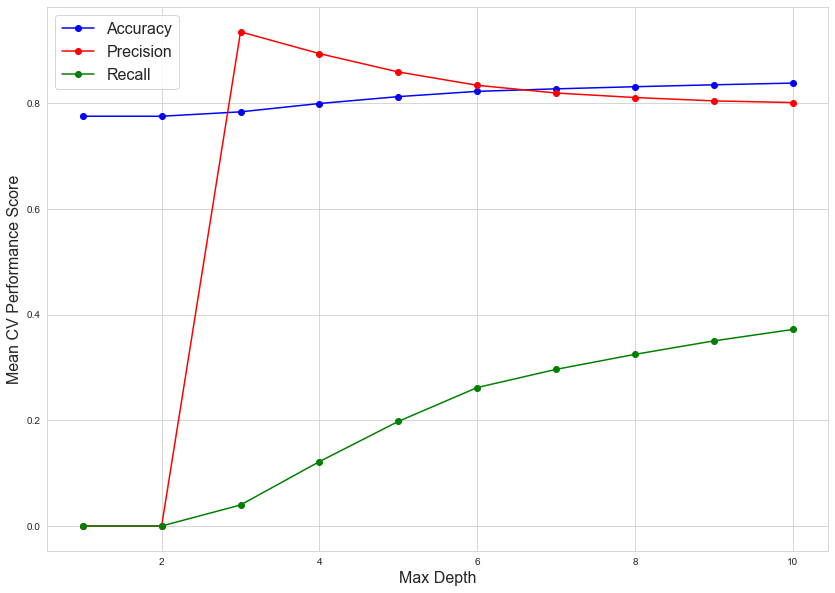

In [39]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [40]:
#Choosing a final model with max depth 20
rff = RandomForestClassifier(n_estimators = 500,max_depth=20, random_state = 440)

rff_clone = clone(rff)
rff_clone.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=440)

In [41]:
y_predict = rff_clone.predict(X_test)

print('The accuracy score is', accuracy_score(y_test,y_predict))
print('The precision score is', precision_score(y_test,y_predict))
print('The recall score is', recall_score(y_test,y_predict))


The accuracy score is 0.8531322962671243
The precision score is 0.7913486005089059
The recall score is 0.4683147195382106


In [42]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, y_predict)

array([[26596,   984],
       [ 4237,  3732]], dtype=int64)

In [47]:
names = []
scores = []
for name, score in zip(X_train_copy.columns,rff_clone.feature_importances_):
    names.append(name)
    scores.append(np.round(score,4))
    
score_df = pd.DataFrame({'feature':names,'importance_score':scores})

score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
7,Humidity3pm,0.2035
2,Rainfall,0.0678
6,Humidity9am,0.0637
9,Pressure3pm,0.0612
3,WindGustSpeed,0.0563
...,...,...
40,Location_Nhil,0.0008
39,Location_Newcastle,0.0008
54,Location_Townsville,0.0007
31,Location_Katherine,0.0006


In [64]:
feat_imp = score_df.sort_values('importance_score',ascending=False)[:10]
feat_imp

,feature,importance_score
7,Humidity3pm,0.2035
2,Rainfall,0.0678
6,Humidity9am,0.0637
9,Pressure3pm,0.0612
3,WindGustSpeed,0.0563
8,Pressure9am,0.0558
11,Temp3pm,0.0499
1,MaxTemp,0.0428
12,RainToday,0.0426
0,MinTemp,0.0423


Text(0.5, 1.0, 'Collinearity of Features')

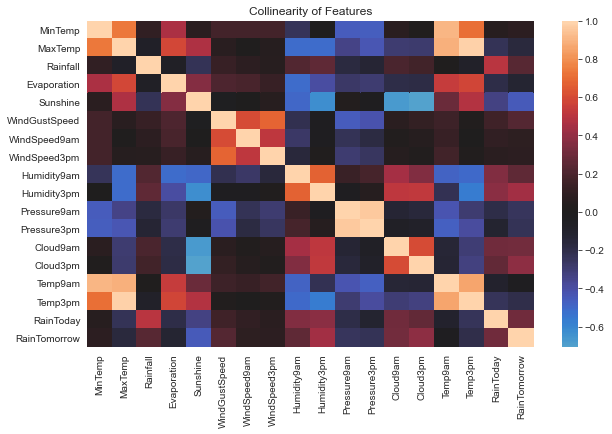

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0)
ax.set_title('Collinearity of Features')

<AxesSubplot:>

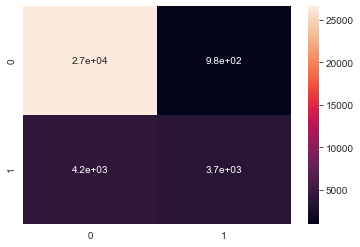

In [53]:
cf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(cf_matrix, annot=True)

Text(0.5, 1.0, 'Confusion Matrix')

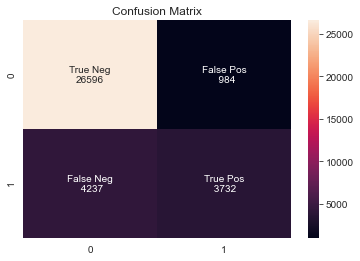

In [68]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:5.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')
plt.title('Confusion Matrix')

In [66]:
pip install dataframe-image
import dataframe_image as dfi

dfi.export(feat_imp, 'feat_imp.png')

SyntaxError: invalid syntax (<ipython-input-66-099193313e87>, line 1)